In [1]:
import pennylane as qml

In [2]:
def q_func0():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

In [3]:
dev = qml.device(name="default.qubit", wires=1)

In [4]:
circuit0 = qml.QNode(q_func0, dev)
circuit0()

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

In [5]:
sv = circuit0()
print(sv)

[ 0.70710678+0.j -0.70710678+0.j]


In [6]:
@qml.qnode(dev)
def circuit1():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

In [7]:
sv = circuit1()
print(sv)

[ 0.70710678+0.j -0.70710678+0.j]


In [8]:
txt_cir = qml.draw(circuit1)()
print(txt_cir)

 0: ──X──H──┤ State 



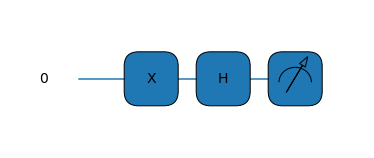

In [9]:
fig_cir, ax_cir = qml.draw_mpl(circuit1)()

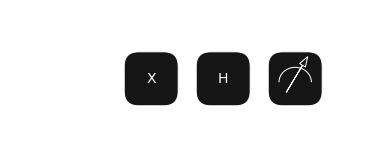

In [10]:
qml.drawer.use_style('black_white_dark')
fig_cir, ax_cir = qml.draw_mpl(circuit1)()

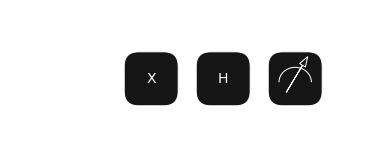

In [11]:
fig_cir

In [12]:
@qml.qnode(dev)
def circuit2():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    
    return qml.probs(wires=0)

In [13]:
probs = circuit2()
print(probs)

[0.5 0.5]


In [14]:
num_shots = 1000
dev_shots = qml.device(name="default.qubit", wires=1, shots=num_shots)

In [15]:
@qml.qnode(dev_shots)
def circuit3():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    
    return qml.sample(wires=0)

In [16]:
samps = circuit3()
print(samps)

[1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0
 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1
 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 1 1 1 1 

In [17]:
import numpy as np
num_zeros = np.count_nonzero(samps == 0)
num_ones = np.count_nonzero(samps == 1)

In [18]:
print('prob of 0: ', num_zeros/num_shots)
print('prob of 1: ', num_ones/num_shots)

prob of 0:  0.506
prob of 1:  0.494


In [19]:
dev2 = qml.device('default.qubit',wires=2)

In [20]:
@qml.qnode(dev2)
def circuit4():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()

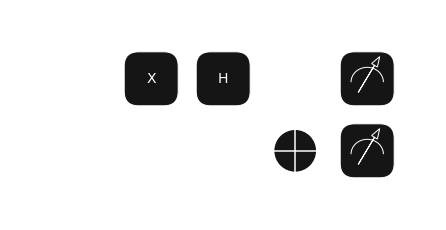

In [21]:
fig_cir, ax_cir = qml.draw_mpl(circuit4)()

In [22]:
sv = circuit4()
print(np.real(sv))

[ 0.70710678  0.          0.         -0.70710678]


In [23]:
from utils import print_statevector
print_statevector(sv)

<IPython.core.display.Math object>

In [38]:
@qml.qnode(dev2)
def circuit5():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.expval(qml.PauliZ(1) @ qml.Identity(0))

In [39]:
print(circuit5())

0.0
